# Modeling and Simulation 4 - Regression Analysis and Markov Chains

Regression analysis is a statistical process that estimates the relationship between a target variable (often called the "outcome" of the experiment) and one or more predictor variables (explanatory variables or "features"). The objectives of a regression analysis are to explain the variability of one variable using other variables.

There are several variants of regression analysis, some examples being simple linear regression (one target variable, one predictor) or multiple linear regression (one target variable, multiple predictors). In the following sections, we'll have a look at these two types and see how to use them and also how we can interpret their results.

The libraries that we're going to use for this lab are NumPy, Matplotlib and scikit-learn.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Simple Linear Regression

Regression analysis of this type can be used for dealing with bivariate data, or datasets that contain two variables. We must come up with a strategy to explain how our variables relate to one another. The purpose of linear regression is to determine the best-fitting line that passes through the data points. This means that it only measures the linear relationship between our variables. First, let's take a look at the example below.

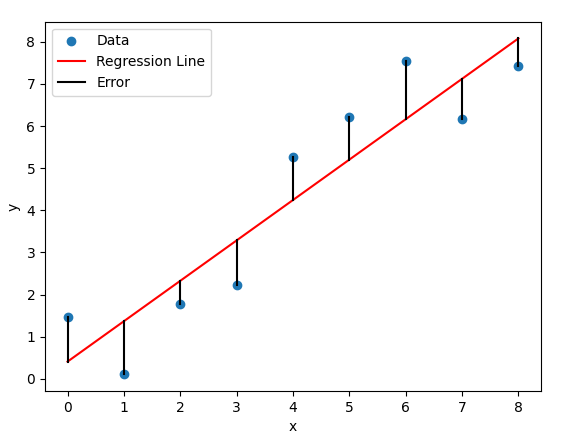

To find the best-fitting line, we need to minimize the distances between the data points and the regression line. You can see these errors above, plotted in black. Do you remember the least squares method? We need to determine the parameters $b_0, b_1$ for the line $y = b_0 + b_1 \cdot x$ such that: $$f(b_0, b_1) = \sum_i \, [y_i - (b_0 + b_1 \cdot x_i)]^2 \, = Min$$ Squaring the difference is required to prevent errors from canceling one another and also to give more weight to bigger errors. A measure of how strongly the data points cluster along the regression line is the correlation coefficient, which can be calculated using the following formula: $$\rho_{X, Y} = \frac{Cov(X, Y)}{\sqrt{D^2(X)} \cdot \sqrt{D^2(Y)}}$$ It only takes values in the range $[-1;\, 1]$:
- a value close to 0 means no correlation
- a value close to 1 means that there is a strong positive correlation (as X increases, Y increases)
- a value close to -1 means that there is a strong negative correlation (as X increases, Y decreases)

Keep in mind that the correlation coefficient only gives us information about how strong the variables cluster along a straight line, but it does not say anything about the slope of the regression line. Now, let's compute the regression line and the correlation coefficient for the previous example.

In [ ]:
# The values for X and Y

x = np.arange(9)
y = np.array([1.4779682, 0.10360782, 1.77156847, 2.21955844, 5.25737226, 6.2115994,
        7.55331935, 6.17478906, 7.42200807])

# TODO Compute the regression line and correlation coefficient
# Hint: Remember from linear algebra, to find the regression line you can solve the 
#       linear system A^T @ A @ [b_0, b_1]^T = A^T @ y; the matrix A is defined for you below

A = np.vstack([np.ones_like(x), x]).T

# Find b_0 and b_1 
b0, b1 = ...

print('The regression line is: y = {:.3f} + {:.3f} * x'.format(b0, b1))

# TODO Compute the correlation coefficient
# Hint: np.corrcoef

rho = ...

print('The correlation coefficient is: rho = {:.3f}'.format(rho))

The value of the correlation coefficient is close to one, which means that there is a strong positive correlation between X and Y. The regression line gives more information about this linear relationship: for one unit change in x, there is a 0.959 proportional change in y. Now, in order to evaluate the quality of this model, we need to validate some assumptions regarding the error term. Assume that each observation Y can be described as follows: $Y = \beta_0 + \beta_1 \cdot x + \epsilon$, where $\beta_0$ and $\beta_1$ are unknown regression coefficients and $\epsilon$ is a random variable, the so called "error term". The assumptions on $\epsilon$ are:
- $\epsilon$ has mean zero, $E(\epsilon) = 0$
- $\epsilon$ has constant variance, that means all random errors have the same variance
- the random errors are independent
- $\epsilon$ is normally distributed

To verify the first three assumptions, we can plot the residuals on the y-axis and the predicted values on the x-axis. A residual describes the error in the model fit for each observation pair $(x_i, y_i)$, representing the difference between the actual value and the value predicted by our model: $e_i = y_i - \hat{y}_i$. It means that each observation pair satisfies $y_i = b_0 + b_1 \cdot x_i + e_i$.

In [ ]:
# TODO Compute the residuals
# Hint: Find y_hat first

y_hat = ...
residuals = ...

# TODO Plot the residuals against the predicted values
# Hint: plt.scatter
# Also, plot the horizontal line y = 0 (hint: plt.axhline), you will see the reason below

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

The purpose of the horizontal line $y = 0$ is to represent the mean of the error term. You should see that the residuals are distributed roughly the same above and below the mean value, so the first assumption is verified. Looking at the plot above, can you say that the second and third assumptions are also verified? To validate the last assumption, we will need to use a statistical test (Kolmogorov-Smirnov test), but you will study it in a future lab.

## Multiple Linear Regression

This type of regression is used when we want more than one predictor variable, because there are multiple situations where the variability of the target cannot be explained using only one predictor. Similar to simple linear regression, the target variable will be a linear function of the predictors. We can describe the model using the following relation: $Y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \dots + \beta_k \cdot x_k + \epsilon$, where $\beta_0, \beta_1, \dots, \beta_k$ are unknown regression coefficients and $\epsilon$ is the error term.

Let's have a look at the dataset below. The observations come from a car manufacturer, representing the current available cars that the customers can buy. The price is in thousands of dollars and the "mpgCity" represents the fuel consumption measured by the manufacturer (miles per gallon). The remaining variables are self-explanatory.

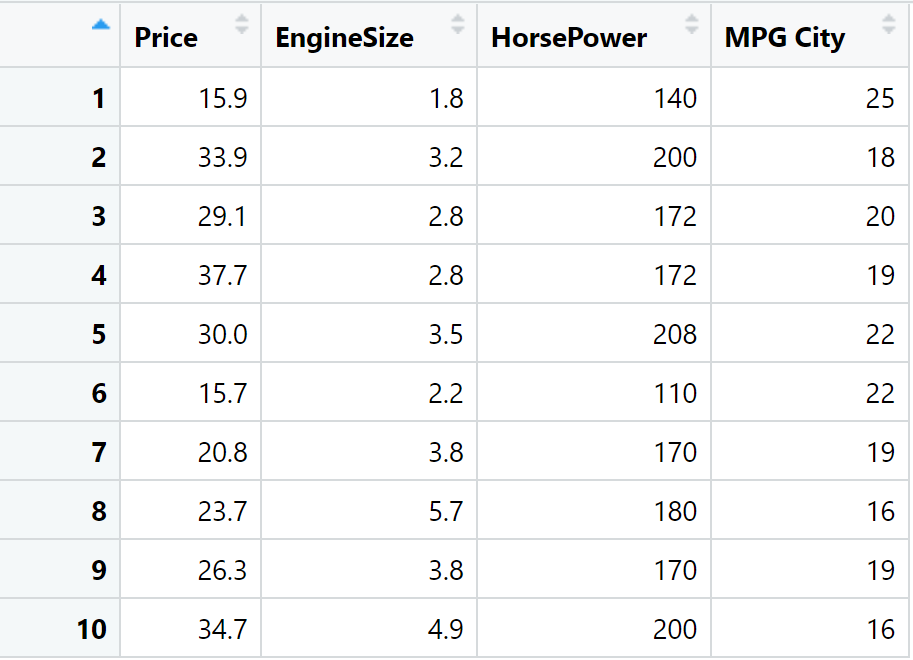

In [ ]:
# Define the variables

price = np.array([15.9, 33.9, 29.1, 37.7, 30.0, 15.7, 20.8, 23.7, 26.3, 34.7])
engineSize = np.array([1.8, 3.2, 2.8, 2.8, 3.5, 2.2, 3.8, 5.7, 3.8, 4.9])
horsePower = np.array([140, 200, 172, 172, 208, 110, 170, 180, 170, 200])
mpgCity = np.array([25, 18, 20, 19, 22, 22, 19, 16, 19, 16])

As an example, we can choose to predict the price of a car using the engine size, horsepower and the city fuel consumption as predictors. First, let's group all of them together in a matrix, where each column represents one predictor. After that, we can use the API provided by the scikit-learn library and fit the predictors to the target values, which in this case are the prices for each car.

In [ ]:
# Group the predictors in a matrix

X = np.column_stack((engineSize, horsePower, mpgCity))

# Fit the regression model

model = LinearRegression()
model.fit(X, price)

# Print regression results
print('Price = {:.3f} + {:.3f} * EngineSize + {:.3f} * HorsePower + {:.3f} * MPG_City'
        .format(model.intercept_, *model.coef_))

print('R-squared: {:.3f}'.format(model.score(X, price)))

The quantity **R-squared** (called the coefficient of determination) represents the variation in price explained by our model. It means that 84.9% of the variation in the price of the cars is explained by the above linear relation. You can play around and change the target variable and the predictors to see if you can obtain a bigger value for the **R-squared**. The coefficient of determintion takes values in the range $[0; 1]$, so the bigger the value, the better the model predicts the price. 

An important thing to know is that the predictors should not be correlated with each other, otherwise the model becomes redundant. For example, if we want to predict the price of a house and we have the size of the house in squared meters and squared centimeters as predictors, the model will not have a good prediction capability because the two independent variables provide redundant information. Let's study our case and see if the predictors are correlated.

In [ ]:
# TODO Compute the correlation matrix
# Hint: np.corrcoef

C = ...
print(f'Correlation matrix: \n{C}')

# TODO Compute a simple linear regression for engineSize and mpgCity
# Hint: Use the API from scikit-learn

print('R-squared: {:.3f}'.format(...))

# TODO Plot the engineSize vs mpgCity

plt.xlabel('Engine Size')
plt.ylabel('MPG City')
plt.legend(['Data', 'Regression'])
plt.show()

You should see that there is some negative correlation between the engine size and the fuel consumption. It is somehow intuitive, if the engine size increases, the fuel consumption increases, so the car will do less miles per gallon. The **R-squared** should be approximately 0.7, telling us that 70% of the variation in fuel consumption is explained by the engine size.

Both simple linear regression and multiple linear regression play an important role in the world of regression analysis. These techniques empower us to make predictions and understand the relationships between the components of the examined data. They are widely used in fields such as economics, social sciences, health research and business analytics.

## Markov Chains

A Markov chain is a process that consists of a finite number of states with the Markovian property and some transition probabilities $p_{ij}$, where $p_{ij}$ is the probability of the process moving from state $j$ to state $i$. The key feature of a Markov chain (the so called "Markovian property") is that its potential future states are fixed, regardless of how the process got to its current state. In other words, the likelihood of going to any given state depends only on the state at that moment and the amount of time that has passed. This has the following mathematical description: $$Pr(X_{n + 1} = x \, | \, X_1 = x_1, X_2 = x_2, \dots, X_n = x_n) = Pr(X_{n + 1} = x \, | \, X_n = x_n)$$

Markov chains are widely used in various fields due to their ability to model many real-world processes that have some degree of randomness. These include areas like Natural Language Processing (where Markov chains can be used to generate text or predict the next word in a sequence), finance (for predicting stock prices or interest rates), weather forecasting etc. In the example below, we have an imaginary stock market represented as a directed graph, with each node denoting a state and each edge having a weight equal to the likelihood that the market would transition between the two states.

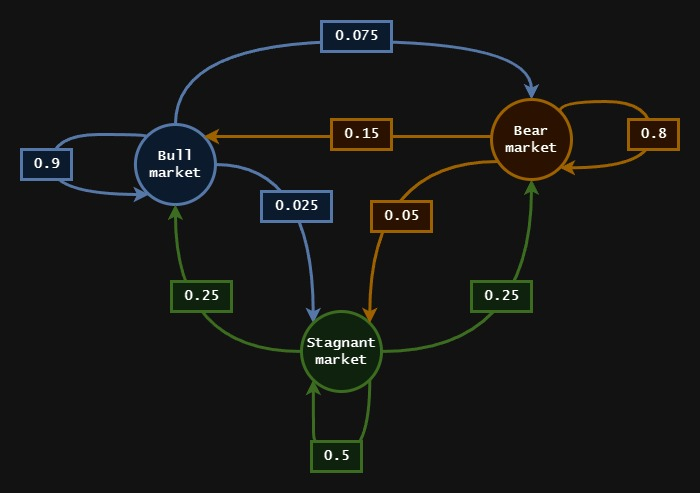

A bull market is the condition of a financial market in which prices are rising or are expected to rise by a significant amount. A bear market is when a market experiences prolonged price declines. The graph above can be interpreted as follows: if its a bull market today, there is a 90% chance that it will be bull market tomorrow, 7.5% chance that it will be bear market and 2.5% chance that the market will be stagnant. We can visualize this better looking at the table below:

<center>

| Stock Market |  Bull | Bear | Stagnant |
|:------------:|:-----:|:----:|:--------:|
|     Bull     |  0.90 | 0.15 |   0.25   |
|     Bear     | 0.075 | 0.80 |   0.25   |
|   Stagnant   | 0.025 | 0.05 |   0.50   |

</center>

In other words, this graph can be converted into a transition matrix A, where each element $a_{ij}$ will be the probability that the market will transition from state $j$ to state $i$: $$A = \begin{bmatrix} 0.9 & 0.15 & 0.25 \\ 0.075 & 0.80 & 0.25 \\ 0.025 & 0.05 & 0.50 \end{bmatrix}, \; a_{ij} \in [0, 1] \; \forall \; i,j$$
The matrix A is a *stochastic* matrix, each column representing a probability vector (the sum of its components equals 1). We can use it to calculate the probability of the next state given a current state: let's suppose we have the probability vector $\mathbf{u} = [bull, bear, stagnant]^T = [0, 1, 0]^T$, meaning that we currently have a bear market. If we multiply the matrix A with this vector, we get: $$A \times \mathbf{u} = \begin{bmatrix} 0.9 & 0.15 & 0.25 \\ 0.075 & 0.80 & 0.25 \\ 0.025 & 0.05 & 0.50 \end{bmatrix} \times \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0.15 \\ 0.80 \\ 0.05 \end{bmatrix}$$
Based on this result, the likelihood of a bull market tomorrow is 0.15, that of a bear market is 0.80, and the likelihood of a stagnant market is 0.05. The probability for each state after two days can now be calculated by multiplying the transition matrix A once again with the vector that we obtained: $$A \times (A \times \mathbf{u}) = \begin{bmatrix} 0.9 & 0.15 & 0.25 \\ 0.075 & 0.80 & 0.25 \\ 0.025 & 0.05 & 0.50 \end{bmatrix} \times \begin{bmatrix} 0.15 \\ 0.80 \\ 0.05 \end{bmatrix} = \begin{bmatrix} 0.26750 \\ 0.66375 \\ 0.06875 \end{bmatrix}$$
After a certain amount of multiplications, the resulting probability vector will become stationary, meaning that its values won't change anymore. This Markov Chain property is called ergodicity.

In [ ]:
# Define the transition matrix, the possible states and the initial state

A = np.array([
    [0.9, 0.15, 0.25],
    [0.075, 0.8, 0.25],
    [0.025, 0.05, 0.5]
])

states = ['Bull Market', 'Bear Market', 'Stagnant Market']
initialState = np.array([0, 1, 0])

In [ ]:
def computeNextState(currentState):
    # TODO Find the probability vector for the next state given the current state
    # Choose a next state based on this probability vector (hint: np.random.choice)
    # Return the probability vector and the name of the next state

    nextState = ...
    stateName = ...

    return nextState, stateName


def nStates(n):
    # TODO Simulate the possible outcome for the next n days
    # Return the state record
    stateRecord = None

    return stateRecord

def findLimit():
    # TODO Multiply the transition matrix with the probability vector until no change occurs anymore
    # Return the limit
    outcome = None

    return outcome

In [ ]:
# Compute the predictions for the next n days and the limit of the probability vector

n = 10
stateRecord = nStates(n)

print(f'Today: {stateRecord[0]}')

for idx, state in enumerate(stateRecord[1:]):
    print(f'Day {idx + 1} prediction: {state}.')

print(f'The limit for the probability vector is: {findLimit()}')